In [1]:
# Import libraries 
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 60)

In [3]:
plans_ahrf = (pd.read_json("./plans_ahrf.json"))

In [4]:
# Set paths and file names
projpath='C:\\Users\\l_gas\\Documents\\Development\\SpringBoard_DataScience\\CapstoneProj1'
stparty= projpath + "\\States_Governors_Party.csv"
stparty = pd.read_csv(stparty)

plans_ahrf = (pd.read_json("./plans_ahrf.json"))
plans_data = pd.merge(left=plans_ahrf, right=stparty, left_on='st', right_on='State Code')

X_raw = plans_data[['state','CBSA_Status', 'Pop2017', 'MedIncome2017','IndMarketEnroll2017','Unemployment','Pparty']]
Y = plans_data[['count_plans']]
print(type(X_raw))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [5]:
# Generate dumies from categorical variables and drop one level to avoid colinearity. 
X = pd.get_dummies(X_raw)
X = X.drop(['state_Wisconsin','CBSA_Status_Central','Pparty_Republican'],axis=1)
print(X.shape)

(2718, 45)


<class 'numpy.ndarray'>


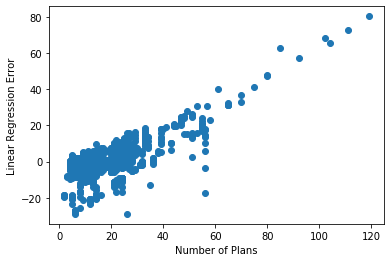

In [6]:
# TRADITIONAL LINEAR REGRESSION
reg = LinearRegression()
reg.fit(X,Y)
Y_hat = reg.predict(X)
print(type(Y_hat))
error = Y - Y_hat

plt.scatter(Y, error)
plt.xlabel("Number of Plans")
plt.ylabel("Linear Regression Error")
plt.show()

0.4949160537053364


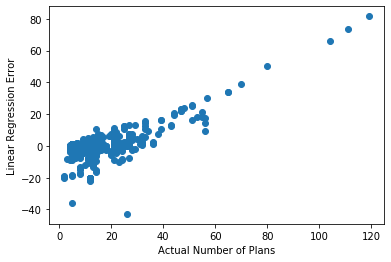

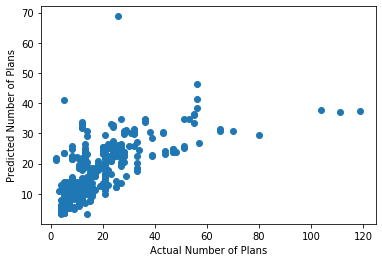

In [7]:
# SIMPLE LINEAR REGRESSION - TRAINING/TEST SETS
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
reg_full = LinearRegression()
reg_full.fit(X_train, Y_train)
Y_pred = reg_full.predict(X_test)
print(reg_full.score(X_test, Y_test))

error = Y_test - Y_pred

#plt.subplot(1,2,1)
plt.scatter(Y_test, error)
plt.xlabel("Actual Number of Plans")
plt.ylabel("Linear Regression Error")
plt.show()

#plt.subplot(1,2,2)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Number of Plans")
plt.ylabel("Predicted Number of Plans")
plt.show()

In [8]:
# CROSS VALIDATION
cvreg = LinearRegression()
cv_results = cross_val_score(cvreg, X, Y, cv=3)
print(cv_results)
print(np.mean(cv_results))

[-1.91042494 -2.88001924  0.06075068]
-1.5765644995520358


In [9]:
# RIDGE REGRESSION
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
ridge_reg = Ridge(alpha=0.1, normalize=True)
ridge_reg.fit(X_train, Y_train)
ridge_pred = ridge_reg.predict(X_test)
ridge_reg.score(X_test, Y_test)

0.4339171365470287

In [12]:
# LASSO REGRESSION
lasso_reg = Lasso(alpha=0.1, normalize=True)
lasso_reg.fit(X_train, Y_train)
lasso_pred = lasso_reg.predict(X_test)
print("LASSO Regression Score:", lasso_reg.score(X_test, Y_test))
lasso_coef = lasso_reg.coef_
print(lasso_coef)

LASSO Regression Score: -0.00463173101365788
[ 0.  0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.  0.  0. -0. -0. -0.  0.
  0.  0. -0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.  0.  0.  0.
 -0. -0.  0. -0.  0. -0.  0. -0. -0.]
